# 作業2

## Draw Random Numbers from Uniform Distributions

### Write code to draw a set of 10,000 random numbers that is uniformly distributed in (-2,3). 
 - Hint: Stretch $U(0,1)$ to fit the bound of $U(-2,3)$.
 
### What are the theoretical mean and standard deviation of the distribution $U(-2,3)$ ?
 
### Show the mean and the standard deviation of the set of random numbers you've drawn. 

In [6]:
using Random, Statistics

# Q1-1. use rand() function and generate 10,000 random numbersr drawn from U(0,5)
random_numbers = rand(10000)
random_numbers = (random_numbers * 5) .- 2

# Q1-2. theoretical mean and standard deviation
println("Theoretically, the mean of U(-2, 3) is ", 0.5)
println("Theoretically, the standard deviation of U(-2, 3) is ", sqrt(25/12))

# Q1-3. show the mean and standard deviation of the random_numbers
mean_val = mean(random_numbers)
var_val = var(random_numbers)
std_val = sqrt(var_val)
println("The mean of the set of random numbers drawn from U(-2,3) is ", mean_val)
println("The standard deviation of random numbers drawn from U(-2,3) is ", std_val)


Theoretically, the mean of U(-2, 3) is 0.5
Theoretically, the standard deviation of U(-2, 3) is 1.4433756729740645
The mean of the set of random numbers drawn from U(-2,3) is 0.486695900977412
The standard deviation of random numbers drawn from U(-2,3) is 1.452403169545675


## Draw Random Numbers from Normal Distributions

### Use `randn()` to draw a $1000\times 2$ matrix of random numbers from $N(2,3)$ (a normal distribution with mean=2 and variance=3). Use `mean()` and `var()` to show that the empirical mean and variance are close to the theoretical values.
- Hint: `randn()` generates N(0,1) random variables; you have to scale it to the appropriate mean and variance.
- Hint: For constants `a` and `b`: $x \sim N(\mu, \sigma^2)$, then $a*x \sim N(a*\mu, \ a^2 \sigma^2)$ and $x+b \sim N(\mu+b, \ \sigma^2)$.

### Use `rand()` to draw a $1000\times 2$ matrix of random numbers from $N(2,3)$. Use `mean()` and `var()` to show that the empirical mean and variance are close to the theoretical values.
- Hint: `rand()` could take distributions as arguments, as we've shown in the class.

In [7]:
using Statistics, Distributions

# Q2-1. use randn() to draw 1000 x 2 matrix from N(2, 3) 
rd_mat   = sqrt(3) * (randn(1000, 2)) .+ 2
emp_mean = mean(rd_mat, dims = 1)
emp_var  = var(rd_mat, dims = 1)
println("The mean of the matrix of random numbers drawn from N(2,3) is ", emp_mean)
println("The variance of the matrix of random numbers drawn from N(2,3) is ", emp_mean)


# Q2-2. use rand() with specification on parameter, to draw 1000 x 2 matrix from N(2, 3) 
rd_mat = rand(Normal(2, sqrt(3)), 1000, 2)
emp_mean = mean(rd_mat, dims = 1)
emp_var  = var(rd_mat, dims = 1)
println("The mean of the matrix of random numbers drawn from N(2,3) is ", emp_mean)
println("The variance of the matrix of random numbers drawn from N(2,3) is ", emp_mean)

The mean of the matrix of random numbers drawn from N(2,3) is 

[1.9822795780322677 2.028048235770412]
The variance of the matrix of random numbers drawn from N(2,3) is [1.9822795780322677 2.028048235770412]
The mean of the matrix of random numbers drawn from N(2,3) is [2.0440642675757643 2.010762226857643]
The variance of the matrix of random numbers drawn from N(2,3) is [2.0440642675757643 2.010762226857643]


## Draw Regression Data: Cross-Sectional Model

Suppose you write your own routine to do fancy estimation on cross-sectional and panel data models. You want to conduct a Monte Carlo analysis to see if the routine works as expected and the returned answer is correct. The first thing you have to do is to generate data with pre-specified parameter values. (So that you could apply your estimation routine to the data and see if the estimated parameter values match the pre-specified (*true*) values.) 

Let's start from the cross-sectional model. The model is:
\begin{aligned} 
  y_i & = \alpha + \beta' x_i + \epsilon_i,\qquad i=1,\ldots,N,\\
  \epsilon_i & \sim N(0, \sigma^2).
\end{aligned}   

There could be more than one $x_i$ variable in the model; let's denote the number of $x_i$ as $\textrm{nofX}$. Write a function to generate data $\{y_i, x_i\}$.The function should allow users to choose values of $\{\alpha, \beta, \sigma^2, \textrm{nofX}, N\}$.
  - Hint: The $x_i$s are assumed (in econometrics) to be fixed and exogenous and therefore the distribution from which they are generated is inconsequential. （前面那句看不懂意思沒關係，重要是下面這句：）You may assume that they are generated from normal distributions.

In [8]:
using Distributions, Random, DataFrames

# Q3. self-defined function for generating X's and corresponding Y
function gen_crossSectional_data(alpha::Float64, beta::Vector{Float64}, sigma_2::Float64, nofX::Int, N::Int)

    # draw X's from normal distribtuion
    x = rand(Normal(), N, nofX)
    epsilon = rand(Normal(0, sqrt(sigma_2)), N)
    
    # calculate vector Y
    y = alpha .+ (x*beta) .+ epsilon

    # convert Y & X to dataframe
    df_y = DataFrame(y = y)
    df_x = DataFrame(x, :auto)
    df = hcat(df_y, df_x, makeunique = true)

    # return dataframe
    return df

end

# testing: choose arbitrary parameters and see the result
alpha = 2024.0
beta = [1.0, 2.0, 3.0]  # match the #(element) to nofX
sigma_2 = 4.0
nofX = 3
N = 100

output = gen_crossSectional_data(alpha, beta, sigma_2, nofX, N)

Row,y,x1,x2,x3
,Float64,Float64,Float64,Float64
1,2024.74,1.42381,0.267952,-0.305716
2,2035.11,-0.828669,1.14325,2.45634
3,2023.3,0.418032,0.690235,-0.779799
4,2015.4,-0.816985,-0.261691,-2.75503
5,2022.03,1.93545,-0.538405,-0.534774
6,2020.1,-1.91317,0.941754,-0.892158
7,2020.18,-1.29538,0.0918382,-1.98809
8,2024.11,0.0920258,0.530096,0.659561
9,2018.11,-0.419966,-0.363922,-1.08733


## Draw Regression Data: Panel Model

Suppose you also want to generate panel data to test your routine. The model is
\begin{aligned}
    y_{it} & = \alpha_i + \beta x_{it} + \epsilon_{it},\qquad i=1,\ldots,N,\ t=1,\ldots,T,\\
   \epsilon_{it} & \sim N(0, \sigma^2).
\end{aligned}   

Here, $i$ is the individual index and $t$ is the time index. For instance, $w_{13}$ means the value of $w$ for the 1st individual at 3rd time period. Assume the above model is the random-effect (RE) panel data model where $\alpha_i \sim N(0,\sigma_a^2)$ is a random variable which is independently distributed from $x_{it}$. Write a function to generate data of $\{y_{it}, x_{it}\}$ with the options of $\{\beta, \sigma^2, \sigma_a^2, \textrm{nofX}, N, T\}$. 

  - Hint: Draw $\alpha_i$ and expand it (`repeat()`) to fill the time periods. Generate $x_{it}$ and $\epsilon_{it}$. Then combine these elements according to the equation to create $y_{it}$.
  - Hint: You don't really need to understand what is RE model to generate the data. Just follow the notation and it should be ok.
  - Hint: `repeat()` would be useful here.
  - Hint: The structure of the dataset should look like the following. Note that $\alpha_i$ is constant within a given $i$ but would change acorss different $i$'s. 


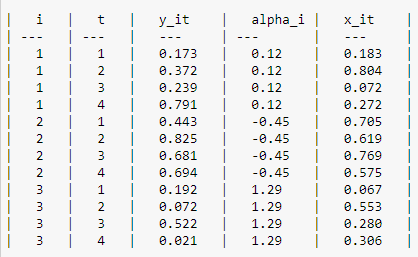




In [9]:
using Distributions, Random, DataFrames

# Q4. self-defined function for generating X's and corresponding Y in panel data
function gen_panel_data(betas::Vector{Float64}, sigma_2::Float64, sigma_2_alpha::Float64, nof_X::Int, N::Int, T::Int)
    
    # draw α_i from N(0, σ^2_α), and expand to all time period (random effect assumption)
    alpha = rand(Normal(0, sqrt(sigma_2_alpha)), N)
    
    # draw X's from normal distribution
    x = rand(Normal(), N, T, nof_X)
    
    # draw ε_it from N(0, σ²)
    epsilon = rand(Normal(0, sqrt(sigma_2)), N, T)
    
    # create DataFrame
    df = DataFrame()
    df.i = repeat(1:N, inner = T)
    df.t = repeat(1:T, outer = N)

    # calculate y_it with multiple Xs
    y = zeros(N * T)
    for n in 1:N
        for t in 1:T
            y[(n-1) * T + t] = alpha[n] + sum(x[n, t, :] .* betas) + epsilon[n, t]
        end
    end
    df.y_it = y

    # assign alpha_i
    df.alpha_i = repeat(alpha, inner = T)

    # reshape x to a long format and insert into the DataFrame
    for j in 1:nof_X
        x_variable = reshape(x[:, :, j], N * T)
        df[!, Symbol("x_", j, ",it")] = x_variable
    end
    
    return df
    
end

# testing: choose arbitrary parameters and see the result
betas = [0.5, -0.2]
sigma_2 = 1.0
sigma_2_alpha = 0.5
nof_X = 2
N = 100
T = 10

df = gen_panel_data(betas, sigma_2, sigma_2_alpha, nof_X, N, T)


Row,i,t,y_it,alpha_i,"x_1,it","x_2,it"
,Int64,Int64,Float64,Float64,Float64,Float64
1,1,1,-0.0155518,-1.00592,0.273906,0.491514
2,1,2,-3.93562,-1.00592,0.092158,-1.04177
3,1,3,0.174291,-1.00592,0.513711,-0.409648
4,1,4,-0.285258,-1.00592,0.407339,1.12529
5,1,5,-1.83735,-1.00592,-0.852427,0.0260732
6,1,6,1.90599,-1.00592,1.34296,-1.40408
7,1,7,-2.81074,-1.00592,-0.346385,-0.220924
8,1,8,0.963267,-1.00592,-0.016452,0.52705
9,1,9,-2.422,-1.00592,0.68456,-0.862421
